# Work in Progress  
### Partial Report saved for backup (this text will be removed when the report is complete)
## A Micro-Xception Model with Regularization to Classify the Kaggle Plant Seedlings Dataset
#### Kevin Maher
#### Regis University MSDS 686 Deep Learning
#### Dr. Geena Kim, Facilitator

### Introduction

A Micro-Xception style model is presented as a method of classifying the Kaggle Plant Seedlings dataset (Kaggle [1]).  The model is a derivation of the well-known Xception image classification acrhitecture (Chollet [3]). The Xception style model has been reduced in size and modified in an effort to better fit the computing resources available and in an effort to perform well on the Plant Seedlings classification problem.  L2 Regularization was added to the model when overefitting and epoch-to-epoch training instability were observed.  This addition of L2 regularization appears to have benefitted the model and help to stabilize its results.  The final model appears to have performed well, achieving a score of 0.98614 on Kaggle.  If this were still an open competition the best achieved score for this model would be tied with a group that is in the upper 4.8-6.3% of scores.  


<img src="L2_micro_xception_89_epoch.png">

Early on the full Xception model was attempted on the problem.  It is believed that the Image Net weights used in the original Xception model are unlikely to transfer well to this dataset because the images for the problem at hand are only of plant seedlings and there were 1,000 different categories of images in the Image Net set (Chollet [2]).  Early modeling efforts using the original Xception model and weights produced an accuracy on a validation subset of the Kaggle training data of 75.5%.  This model used the original weights from Image Net but trained the layers from block 13 outwards in the Xception model.  Thus only part of the Xception model was retrained on the new data, most of the model used the Image Net Weights.  The author was not able to train a full Xception model to full depth because of memory limitations in the computer hardware available.  The 75% accuracy was considered unacceptable and the search for a better model began.  This model is documented in the file 'plant_xception.py'.  

The decision was made to search for a model that would fit the problem well and train with the computing and semester time resources available.  In this process both Xception and Inception V3 style models were tried (Szegedy, et. al. [4]).  Both were modified to a reduced size from their original form by removing blocks of code and layers. This was done in order to better fit the available computing resources and hopefully to  produce a model that trained faster.  At the end of the project the modified Xception style architecture out-performed the modified Inception architecture in classification accuracy.  However the models produced accuracy results that were very close and the possible combinations of blocks and block sizes for these models are endless so it would not be reasonable to conclude that one architecture is superior to the other in general terms.  

### The Modified Xception Architecture

The Xception model was derived directly from code provided in Keras by Chollet (Chollet [3]).  Through a number of experiments it was changed in several ways in a search for accuracy and consistency on the plant seedling classification data.  The code for the new model can be found in the Git repository in the Python file '$plant_micro_xception_L2_Reg_test_70_30.py'

The first and second blocks of the model were retained along with their residual layers.  Blocks 3 and 4 were removed in the interest of a smaller model.  The middle 'for' loop that creates 8 blocks in the original model was reduced to producing only 2 blocks in the new model.  The last two blocks after the 'for' loop were retained but the number of filters was drastically reduced.  The original Xception model can be examined by opening the file 'xception.py' in the Python Keras implementation.  It can be noted that the number of filters tends to grow with each block and often within a block.  With many fewer blocks this growth was restrained.  It was also necessary to reduce the filter sizes to account for the removed blocks so that the sizes would remain compatible and the model would compile.  The goal was a smaller model that would fit in memory and not excessively overfit the problem.

A top layer was derived specifically to match the plant seedlings challenge.  Early experimentation tended to show that two dense layers gave better accuracy than one, so two dense layers of sizes 256 then 64 were utilized.  The output layer is a 'softmax' layer matching the 12 classes in the problem and is typical of output layers for convolutional neural network (CNN) models where an image can contain only one from a number of classes.  Additionally, early experimentation showed that a smaller learning rate might benefit the model and be combined with a decay rate.  An 'Adam' optimizer was used because of its reputation for reliabilty but time did not permit exporation of other optimizer options.  The learning rate was set at 0.0008 and the decay set to 0.001.

When overfitting and epoch-to-epoch instability in validation losses and accuracy were observed in training the model, another modification was made in an effort to help reduce these problems.  L2 regularization was added to every layer of the Xception model, including all of the separable convolution blocks that represent the Xception-style architecture.  L2 regularization was used with its normal default value of 0.001.  It had a dramatic effect on the model.  Model training was observed to sometimes produce a result where validation set accuracy would drop dramatically between epochs, sometimes by 10% or more.  Adding regularization cured this instability and the model became very much more stable.  Overall accuracy potential also seems to have improved along with the ability to fit previously unseen data such as the Kaggle web site test set.  

### The Modified Micro-Xception Code

In [1]:
# imports
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import layers
from tensorflow.python.keras.applications.imagenet_utils import _obtain_input_shape
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import GlobalMaxPooling2D
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import SeparableConv2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import optimizers
from tensorflow.python.keras import regularizers
import tensorflow as tf
print('done with imports')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


done with imports


In [2]:
# model building function
def build_model(input_shape=None):
    # code removed until closer to due date

    return model

print('model function complete')

model function complete


In [5]:
# instantiate the model and check its size
EPOCHS = 120
LAST_EPOCH = 0
REPEATS = 10
train_size= 3319
validation_size = 1431
test_size = 794
batch_size = 20
seed = 321
im_size = 224
num_classes = 12
model = build_model(input_shape=(im_size, im_size, 3))
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

### Model Setup Results

As can be seen in the code above, the modified model has around 1.66 million parameters, most of which are trainable.  The original Xception model has around 22.9 million parameters (Keras [5]).  The goal of providing a much smaller and simpler model that still fits the problem well has been achieved as can be seen from the final best Kaggle score of 0.98614.  The model appears to have been successfully adapted to this problem which is smaller and simpler than the original Image Net data that the model was originally designed for.

### Model Training Stability

While it might be observed that the model still overfits some, the stability epoch-to-epoch is much imprpoved over the model without regularization.  It is also difficult to tell if the model has reached its full potential, even after 120 epochs.

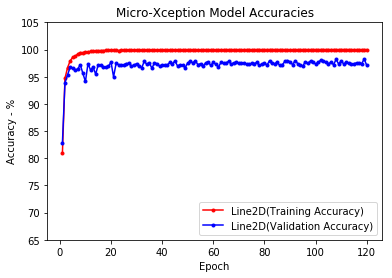

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('df_mx_l2_70_30_120.csv')

plt.figure()
p1 =plt.plot(df['epoch'], df['accs']*100.0, color='r', marker='.', label='Training Accuracy')
p2 =plt.plot(df['epoch'], df['val_accs']*100.0, color='b', marker='.', label='Validation Accuracy')
#p3 =plt.plot(df['epoch'], df['test_accs']*100.0, color='g', marker='.', label='Test Set Accuracy')
p = p1 + p2 #+ p3
plt.title('Micro-Xception Model Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy - %')
plt.legend(p, loc='lower right')
plt.ylim(65.0, 105.0)
plt.show()

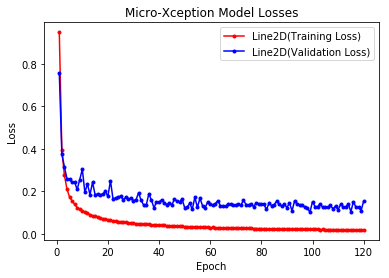

In [9]:
plt.figure()
p1 =plt.plot(df['epoch'], df['losses'], color='r', marker='.', label='Training Loss')
p2 =plt.plot(df['epoch'], df['val_losses'], color='b', marker='.', label='Validation Loss')
#p3 =plt.plot(df['epoch'], df['test_losses'], color='g', marker='.', label='Test Set Loss')
p = p1 + p2 #+ p3
plt.title('Micro-Xception Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(p, loc='upper right')
plt.show()

#### References:
[1] Kaggle. Plant Seedlings Classification.  Retrieved from: https://www.kaggle.com/c/plant-seedlings-classification.  
[2] Chollet, Francois.  Deep Learning with Python.  Manning.  Shelter Island, N.Y.  
[3] Chollet, Francois.  Xception: Deep Learning with Depthwise Separable Convolutions.  Cornell University Library.  Retrieved from: https://arxiv.org/abs/1610.02357.  
[4] Szegedy, Christian; Vanhoucke, Vincent; Ioffe, Sergey; Shlens, Jonathon; Wojna, Zbigniew.  Rethinking the Inception Architecture for Computer Vision.  Cornell University Library.  Retrieved from: https://arxiv.org/abs/1512.00567.  
[5] Keras.  Applications.  Keras Documentation.  Retrieved from: https://keras.io/applications/.  
